# pycaret machine learning

# setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reference: https://www.pycaret.org/
# reference: https://pycaret.org/guide/
# reference: https://github.com/pycaret/

In [3]:
# reference: https://pycaret.org/install/
# pip install pycaret 
# pip install pycaret-nightly (if stable won't install on mac)
# conda install -c conda-forge shap

In [4]:
import pycaret
from pycaret import classification, regression, clustering, nlp, utils

In [5]:
utils.version()

pycaret-nightly-0.33


In [6]:
# workflow:
# .setup() > process data
# .compare_models() > find best model
# .create_model() > create model
# .tune_model() > tune model hyperparameters
# .calibrate_model() > calibrate model propabilities (classification)
# .evaluate_model() > result plots
# .interpret_model() > interpretation plot
# .predict_model() > predictions on test data
# .finalize_model() > recreate model with all data
# .deploy_model()

In [7]:
# other functions:
# .optimize_threshold()
# .ensemble_model()
# .blend_models()
# .stack_models()
# .save_model()
# .load_model()

# datasets

In [8]:
df_titanic = sns.load_dataset('titanic')
df_iris = sns.load_dataset('iris')
df_diamonds = sns.load_dataset('diamonds')

# classification (binary)

In [9]:
# process dataset
classification_experiment_2 = classification.setup(
    data=df_titanic,
    target='survived',
    train_size=0.7,
    normalize=True,
    numeric_features=['age','sibsp','parch','fare'],
    categorical_features=['sex','who','adult_male','alone','embarked'], 
    ordinal_features={'pclass' : ['3','2','1']},
    ignore_features=['embark_town','alive','class','deck']
)

Setup Succesfully Completed!


,Description,Value
0,session_id,4961
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(891, 15)"
4,Missing Values,True
5,Numeric Features,4
6,Categorical Features,8
7,Ordinal Features,True
8,High Cardinality Features,False
9,High Cardinality Method,None


In [10]:
# automatically compare all models 
best_classification_model = classification.compare_models(
    turbo=False,
)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,SVM - Radial Kernel,0.8264,0.8444,0.7326,0.8007,0.7610,0.6260,0.6310,0.0439
1,Logistic Regression,0.8217,0.8622,0.7574,0.7761,0.7642,0.6212,0.6237,0.0251
2,Light Gradient Boosting Machine,0.8202,0.8519,0.7368,0.7879,0.7584,0.6158,0.6194,0.0346
3,K Neighbors Classifier,0.8186,0.8345,0.7236,0.7904,0.7527,0.6102,0.6142,0.0029
4,Ridge Classifier,0.8184,0.0000,0.7322,0.7826,0.7531,0.6104,0.6143,0.0046
5,Linear Discriminant Analysis,0.8168,0.8616,0.7322,0.7795,0.7515,0.6074,0.6112,0.0054
6,MLP Classifier,0.8154,0.8437,0.6821,0.8065,0.7373,0.5970,0.6032,1.3471
7,CatBoost Classifier,0.8121,0.8558,0.6900,0.7958,0.7367,0.5920,0.5976,1.3804
8,Random Forest Classifier,0.8106,0.8469,0.7031,0.7878,0.7402,0.5921,0.5971,0.0225
9,Gradient Boosting Classifier,0.8090,0.8555,0.6993,0.7856,0.7358,0.5875,0.5934,0.0879


In [11]:
# create a model 
# 'lr'        Logistic Regression             
# 'knn'       K Nearest Neighbour            
# 'nb'        Naive Bayes             
# 'dt'        Decision Tree Classifier                   
# 'svm'       SVM - Linear Kernel                 
# 'rbfsvm'    SVM - Radial Kernel               
# 'gpc'       Gaussian Process Classifier                  
# 'mlp'       Multi Level Perceptron                  
# 'ridge'     Ridge Classifier                
# 'rf'        Random Forest Classifier                   
# 'qda'       Quadratic Discriminant Analysis                  
# 'ada'       Ada Boost Classifier                 
# 'gbc'       Gradient Boosting Classifier                  
# 'lda'       Linear Discriminant Analysis                  
# 'et'        Extra Trees Classifier                   
# 'xgboost'   Extreme Gradient Boosting              
# 'lightgbm'  Light Gradient Boosting              
# 'catboost'  CatBoost Classifier   
classification_model = classification.create_model(
    estimator='rf'
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7937,0.8376,0.6250,0.7895,0.6977,0.5442,0.5528
1,0.8095,0.7756,0.7083,0.7727,0.7391,0.5896,0.5910
2,0.8413,0.9209,0.6667,0.8889,0.7619,0.6465,0.6615
3,0.8226,0.8547,0.7500,0.7826,0.7660,0.6232,0.6236
4,0.8065,0.8070,0.6667,0.8000,0.7273,0.5792,0.5850
5,0.8226,0.8904,0.7500,0.7826,0.7660,0.6232,0.6236
6,0.8710,0.8481,0.7083,0.9444,0.8095,0.7149,0.7319
7,0.8387,0.8887,0.8333,0.7692,0.8000,0.6652,0.6667
8,0.6935,0.7604,0.5833,0.6087,0.5957,0.3492,0.3494
9,0.8065,0.8857,0.7391,0.7391,0.7391,0.5853,0.5853


In [12]:
# automatically tune model
tuned_classification_model = classification.tune_model(
    estimator=classification_model,
    n_iter=100
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8095,0.8851,0.6250,0.8333,0.7143,0.5758,0.5892
1,0.7937,0.7826,0.7083,0.7391,0.7234,0.5590,0.5593
2,0.8889,0.9279,0.7917,0.9048,0.8444,0.7586,0.7627
3,0.8065,0.8925,0.7500,0.7500,0.7500,0.5921,0.5921
4,0.7742,0.8503,0.7083,0.7083,0.7083,0.5241,0.5241
5,0.8065,0.9156,0.7083,0.7727,0.7391,0.5857,0.5871
6,0.8226,0.8026,0.6667,0.8421,0.7442,0.6112,0.6209
7,0.8710,0.8810,0.8333,0.8333,0.8333,0.7281,0.7281
8,0.7581,0.7900,0.6250,0.7143,0.6667,0.4781,0.4807
9,0.8226,0.8896,0.6957,0.8000,0.7442,0.6094,0.6129


In [13]:
# calibrate model
calibrated_classification_model = classification.calibrate_model(
    estimator=tuned_classification_model
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8254,0.8627,0.5833,0.9333,0.7179,0.6010,0.6359
1,0.8413,0.8061,0.7083,0.8500,0.7727,0.6523,0.6587
2,0.8730,0.9380,0.7500,0.9000,0.8182,0.7219,0.7289
3,0.7903,0.8607,0.7083,0.7391,0.7234,0.5547,0.5550
4,0.7742,0.8383,0.6667,0.7273,0.6957,0.5167,0.5179
5,0.8548,0.9287,0.7917,0.8261,0.8085,0.6917,0.6921
6,0.8226,0.7971,0.6667,0.8421,0.7442,0.6112,0.6209
7,0.8548,0.8734,0.8333,0.8000,0.8163,0.6964,0.6968
8,0.7581,0.7939,0.5833,0.7368,0.6512,0.4698,0.4773
9,0.8548,0.9365,0.6957,0.8889,0.7805,0.6744,0.6858


In [14]:
# model evaluation plots
classification.evaluate_model(
    estimator=calibrated_classification_model
)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [15]:
# test set prediction
test_predictions = classification.predict_model(
    estimator=calibrated_classification_model,
)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Calibrated Classifier C V,0.8246,0.8812,0.7184,0.8043,0.759,0.6218,0.6243


In [16]:
# finalize model 
final_classification_model = classification.finalize_model(
    estimator=calibrated_classification_model
)

In [17]:
# display model
print(final_classification_model)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight=None,
                                                             criterion='entropy',
                                                             max_depth=40,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=1,
                                                             min_samples_split=9,
                              

# classification (multi-class)

In [18]:
# process dataset
classification_experiment_2 = classification.setup(
    data=df_iris,
    target='species',
    train_size=0.7,
    normalize=True,
    remove_perfect_collinearity=True,
    polynomial_features=True,
    polynomial_degree=2,
    trigonometry_features=True,
    numeric_features=['sepal_length','sepal_width','petal_length','petal_width'],
)

Setup Succesfully Completed!


,Description,Value
0,session_id,3095
1,Target Type,Multiclass
2,Label Encoded,"setosa: 0, versicolor: 1, virginica: 2"
3,Original Data,"(150, 5)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [19]:
# automatically compare all models 
best_classification_model = classification.compare_models(
    turbo=False,
)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Gradient Boosting Classifier,0.9509,0.0000,0.9583,0.9662,0.9501,0.9272,0.9353,0.1352
1,SVM - Radial Kernel,0.9427,0.0000,0.9500,0.9598,0.9420,0.9148,0.9235,0.0135
2,Naive Bayes,0.9427,0.0000,0.9500,0.9598,0.9420,0.9148,0.9235,0.0093
3,Decision Tree Classifier,0.9418,0.0000,0.9500,0.9594,0.9410,0.9136,0.9228,0.0132
4,Quadratic Discriminant Analysis,0.9327,0.0000,0.9389,0.9553,0.9328,0.8999,0.9106,0.0104
5,Extreme Gradient Boosting,0.9327,0.0000,0.9417,0.9525,0.9319,0.9000,0.9103,0.0372
6,CatBoost Classifier,0.9327,0.0000,0.9417,0.9553,0.9311,0.9003,0.9122,2.4629
7,Gaussian Process Classifier,0.9327,0.0000,0.9417,0.9553,0.9311,0.9003,0.9122,0.0358
8,K Neighbors Classifier,0.9327,0.0000,0.9417,0.9553,0.9311,0.9003,0.9122,0.0091
9,Linear Discriminant Analysis,0.9236,0.0000,0.9306,0.9439,0.9220,0.8864,0.8972,0.0119


In [20]:
# create a model 
# 'lr'        Logistic Regression             
# 'knn'       K Nearest Neighbour            
# 'nb'        Naive Bayes             
# 'dt'        Decision Tree Classifier                   
# 'svm'       SVM - Linear Kernel                 
# 'rbfsvm'    SVM - Radial Kernel               
# 'gpc'       Gaussian Process Classifier                  
# 'mlp'       Multi Level Perceptron                  
# 'ridge'     Ridge Classifier                
# 'rf'        Random Forest Classifier                   
# 'qda'       Quadratic Discriminant Analysis                  
# 'ada'       Ada Boost Classifier                 
# 'gbc'       Gradient Boosting Classifier                  
# 'lda'       Linear Discriminant Analysis                  
# 'et'        Extra Trees Classifier                   
# 'xgboost'   Extreme Gradient Boosting              
# 'lightgbm'  Light Gradient Boosting              
# 'catboost'  CatBoost Classifier   
classification_model = classification.create_model(
    estimator='xgboost'
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9091,0.0000,0.9167,0.9318,0.9091,0.8642,0.8750
2,0.9091,0.0000,0.9167,0.9318,0.9091,0.8642,0.8750
3,0.9091,0.0000,0.9167,0.9318,0.9091,0.8642,0.8750
4,0.9000,0.0000,0.9167,0.9250,0.9000,0.8507,0.8636
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8000,0.0000,0.8333,0.8800,0.7917,0.7059,0.7504
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.9000,0.0000,0.9167,0.9250,0.9000,0.8507,0.8636


In [21]:
# automatically tune model
tuned_classification_model = classification.tune_model(
    estimator=classification_model,
    n_iter=100
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,0.0000,0.9167,0.9318,0.9091,0.8642,0.8750
3,0.8182,0.0000,0.8333,0.8909,0.8106,0.7317,0.7695
4,0.9000,0.0000,0.9167,0.9250,0.9000,0.8507,0.8636
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8000,0.0000,0.8333,0.8800,0.7917,0.7059,0.7504
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [22]:
# model evaluation plots
classification.evaluate_model(
    estimator=tuned_classification_model
)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [23]:
# test set prediction
test_predictions = classification.predict_model(
    estimator=tuned_classification_model,
)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,One Vs Rest Classifier,0.9783,0,0.9778,0.9796,0.9782,0.9674,0.9681


In [24]:
# finalize model
final_classification_model = classification.finalize_model(
    estimator=tuned_classification_model
)

In [25]:
# display model
print(final_classification_model)

OneVsRestClassifier(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.5, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.77,
                                            max_delta_step=0, max_depth=110,
                                            min_child_weight=4, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=110, n_jobs=-1,
                                            num_class=3, num_parallel_tree=1,
                                            objective='multi:softprob',
                                            random_stat

# regression

In [26]:
# process dataset
regression_experiment_1 = regression.setup(
    data=df_diamonds,
    target='price',
    train_size=0.7,
    normalize=True,
    remove_perfect_collinearity=True,
    polynomial_features=True,
    polynomial_degree=2,
    numeric_features=['carat','depth','table','x','y','z'],
    ordinal_features={
        'cut' : ['Fair','Good','Very Good','Premium','Ideal'],
        'color' : ['J','I','H','G','F','E','D'],
        'clarity': ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'],
        },
)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,5645
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(53940, 10)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,3
7,Ordinal Features,True
8,High Cardinality Features,False
9,High Cardinality Method,None


In [27]:
# automatically compare all models 
best_regression_model = regression.compare_models(
    turbo=True,
)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,291.4633,328406.1172,570.1792,0.9793,0.1071,0.0803,2.2095
1,Extra Trees Regressor,301.2895,339109.9609,580.2975,0.9786,0.1039,0.0782,0.8285
2,Light Gradient Boosting Machine,304.9970,341969.1434,583.1395,0.9784,0.1116,0.0860,0.1338
3,Random Forest,308.2206,356223.7420,595.4997,0.9775,0.1058,0.0795,1.0391
4,Extreme Gradient Boosting,312.5215,370000.3891,606.7657,0.9766,0.1041,0.0787,0.5735
5,Gradient Boosting Regressor,351.5070,401260.1617,631.0494,0.9746,0.1494,0.1089,0.7155
6,Decision Tree,425.8414,657790.4272,807.0765,0.9583,0.1482,0.1091,0.0436
7,K Neighbors Regressor,445.2798,704054.6334,835.9819,0.9555,0.1611,0.1234,0.0084
8,AdaBoost Regressor,885.7050,1314629.7644,1145.7337,0.9165,0.4359,0.4625,0.3822
9,Lasso Regression,767.0263,1382436.9786,1172.8783,0.9122,0.5914,0.4059,0.0522


In [28]:
# create a model 
# 'lr'        Linear Regression                   
# 'lasso'     Lasso Regression                
# 'ridge'     Ridge Regression                
# 'en'        Elastic Net                   
# 'lar'       Least Angle Regression                  
# 'llar'      Lasso Least Angle Regression                   
# 'omp'       Orthogonal Matching Pursuit                     
# 'br'        Bayesian Ridge                   
# 'ard'       Automatic Relevance Determination                  
# 'par'       Passive Aggressive Regressor                    
# 'ransac'    Random Sample Consensus       
# 'tr'        TheilSen Regressor                   
# 'huber'     Huber Regressor                               
# 'kr'        Kernel Ridge                                     
# 'svm'       Support Vector Machine                           
# 'knn'       K Neighbors Regressor                           
# 'dt'        Decision Tree                                    
# 'rf'        Random Forest                                    
# 'et'        Extra Trees Regressor                            
# 'ada'       AdaBoost Regressor                              
# 'gbr'       Gradient Boosting Regressor                               
# 'mlp'       Multi Level Perceptron                          
# 'xgboost'   Extreme Gradient Boosting                   
# 'lightgbm'  Light Gradient Boosting                    
# 'catboost'  CatBoost Regressor        
regression_model = regression.create_model(
    estimator='lightgbm'
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,291.5331,352001.4565,593.2971,0.9780,0.1069,0.0830
1,275.9774,306176.3456,553.3320,0.9793,0.1023,0.0802
2,337.9141,456062.2915,675.3238,0.9731,0.1176,0.0886
3,306.5175,339496.0028,582.6629,0.9783,0.1186,0.0853
4,306.1223,338771.3694,582.0407,0.9774,0.1098,0.0849
5,310.4760,340844.8921,583.8192,0.9769,0.1145,0.0888
6,322.7462,396908.2588,630.0066,0.9763,0.1170,0.0887
7,283.1715,258236.4711,508.1697,0.9823,0.1071,0.0851
8,307.3884,339655.5910,582.7998,0.9817,0.1140,0.0893
9,308.1234,291538.7554,539.9433,0.9803,0.1082,0.0860


In [29]:
# automatically tune model
tuned_regression_model = regression.tune_model(
    estimator=regression_model,
    n_iter=100
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,298.1192,372809.2580,610.5811,0.9767,0.1072,0.0833
1,277.2842,310555.6870,557.2752,0.9790,0.1006,0.0794
2,335.6720,459733.9617,678.0368,0.9729,0.1124,0.0858
3,305.4750,340028.1103,583.1193,0.9783,0.1131,0.0830
4,295.6869,317475.0526,563.4492,0.9789,0.1074,0.0829
5,312.3395,368535.0806,607.0709,0.9751,0.1127,0.0870
6,316.3316,388339.8494,623.1692,0.9768,0.1125,0.0851
7,283.3664,255596.8881,505.5659,0.9824,0.1032,0.0823
8,312.3565,344915.5134,587.2951,0.9815,0.1137,0.0888
9,301.5971,285182.4110,534.0247,0.9808,0.1089,0.0858


In [30]:
# model evaluation plots
regression.evaluate_model(
    estimator=tuned_regression_model
)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

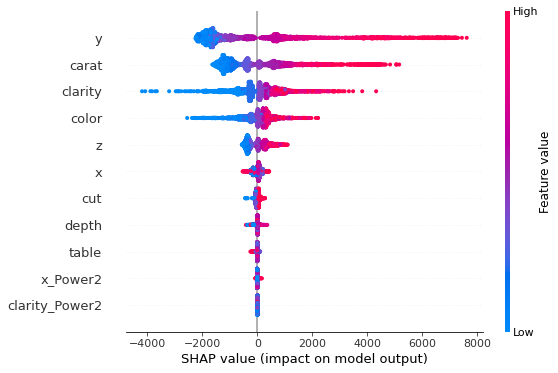

In [31]:
# model interpretation plots
regression.interpret_model(
    estimator=tuned_regression_model
)

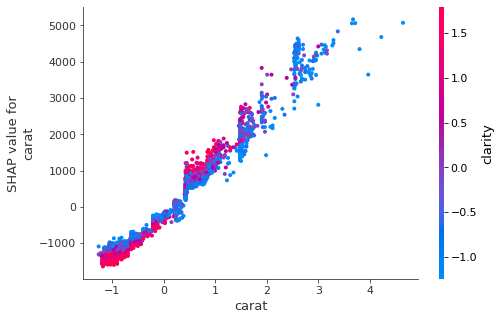

In [32]:
# model interpretation plots
regression.interpret_model(
    estimator=tuned_regression_model,
    plot='correlation'
)

In [33]:
# test set prediction
test_predictions = regression.predict_model(
    estimator=tuned_regression_model,
)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,307.6354,355397.2233,596.152,0.9766,0.1131,0.0859


In [34]:
# finalize model
final_regression_model = regression.finalize_model(
    estimator=tuned_regression_model
)

In [35]:
# display model
print(final_regression_model)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=90,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.4,
              n_estimators=70, n_jobs=-1, num_leaves=60, objective=None,
              random_state=5645, reg_alpha=0.6, reg_lambda=0.1, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


# clustering 

In [36]:
# split dataset
from sklearn.model_selection import train_test_split
X = df_iris[['sepal_length','sepal_width','petal_length','petal_width']]
y = df_iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
df_iris_train = pd.concat([X_train, y_train], axis=1)
df_iris_test = pd.concat([X_test, y_test], axis=1)

In [37]:
# process dataset
clustering_experiment_1 = clustering.setup(
    data=df_iris_train,
    numeric_features=['sepal_length','sepal_width','petal_length','petal_width'],
    ignore_features=['species'],
    normalize=True
)

Setup Succesfully Completed!


,Description,Value
0,session_id,5549
1,Original Data,"(105, 5)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,1
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(105, 4)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


In [38]:
# create model
# 'kmeans'        K-Means Clustering
# 'ap'            Affinity Propagation
# 'meanshift'     Mean shift Clustering
# 'sc'            Spectral Clustering
# 'hclust'        Agglomerative Clustering
# 'dbscan'        Density-Based Spatial Clustering
# 'optics'        OPTICS Clustering                               
# 'birch'         Birch Clustering                                 
# 'kmodes'        K-Modes Clustering  
clustering_model = clustering.create_model(
    model='kmeans',
    num_clusters=3,
)

,Metric
Silhouette,0.4369
Calinski-Harabasz,147.7057
Davies-Bouldin,0.8400


In [39]:
# assign clusters
clustering_results = clustering.assign_model(
    model=clustering_model
)

In [40]:
# view results
clustering_results.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Cluster
90,5.5,2.6,4.4,1.2,versicolor,Cluster 1
70,5.9,3.2,4.8,1.8,versicolor,Cluster 2
13,4.3,3.0,1.1,0.1,setosa,Cluster 0
139,6.9,3.1,5.4,2.1,virginica,Cluster 2
8,4.4,2.9,1.4,0.2,setosa,Cluster 0


In [41]:
# view results
clustering_results.groupby(by=['Cluster','species']).size()

Cluster    species   
Cluster 0  setosa        30
Cluster 1  versicolor    29
           virginica     11
Cluster 2  versicolor     9
           virginica     26
dtype: int64

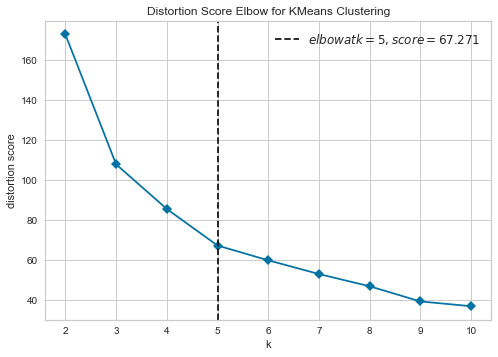

In [43]:
# plots
clustering.plot_model(
    model=clustering_model,
    plot='elbow'
)

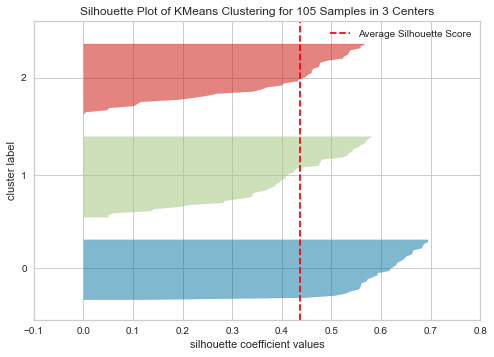

In [44]:
# plots
clustering.plot_model(
    model=clustering_model,
    plot='silhouette'
)

In [45]:
# plots
clustering.plot_model(
    model=clustering_model,
    plot='distribution',
    feature='sepal_width'
)

In [46]:
# plots
clustering.plot_model(
    model=clustering_model,
    plot='distribution',
    feature='species'
)

In [47]:
# model predictions
clustering_test_predictions = clustering.predict_model(
    clustering_model,
    data=df_iris_test
)

In [48]:
# view results
clustering_test_predictions.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Cluster
40,5.0,3.5,1.3,0.3,setosa,Cluster 0
42,4.4,3.2,1.3,0.2,setosa,Cluster 0
148,6.2,3.4,5.4,2.3,virginica,Cluster 2
19,5.1,3.8,1.5,0.3,setosa,Cluster 0
117,7.7,3.8,6.7,2.2,virginica,Cluster 2


In [49]:
# view results
clustering_test_predictions.groupby(by=['Cluster','species']).size()

Cluster    species   
Cluster 0  setosa        20
Cluster 1  versicolor     9
           virginica      3
Cluster 2  versicolor     3
           virginica     10
dtype: int64